# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.077481e+01     7.196890e+00
 * time: 0.0044629573822021484
     1     2.989182e+01     4.707140e+00
 * time: 0.01987600326538086
     2     2.133277e+01     6.101252e+00
 * time: 0.03780412673950195
     3     1.735239e+01     7.728620e+00
 * time: 0.054978132247924805
     4     1.297773e+01     3.906996e+00
 * time: 0.07230901718139648
     5     9.803992e+00     1.350030e+00
 * time: 0.13605594635009766
     6     9.016296e+00     1.384212e+00
 * time: 0.14983010292053223
     7     8.635546e+00     7.072638e-01
 * time: 0.1633000373840332
     8     8.471894e+00     5.706007e-01
 * time: 0.17652392387390137
     9     8.455267e+00     1.109446e+00
 * time: 0.18727493286132812
    10     8.448039e+00     1.209146e+00
 * time: 0.19759702682495117
    11     8.428824e+00     8.001197e-01
 * time: 0.20792412757873535
    12     8.339050e+00     7.652731e-01
 * time: 0.21817493438720703
    13     8.250654e+00     5.731326e-01
 * tim

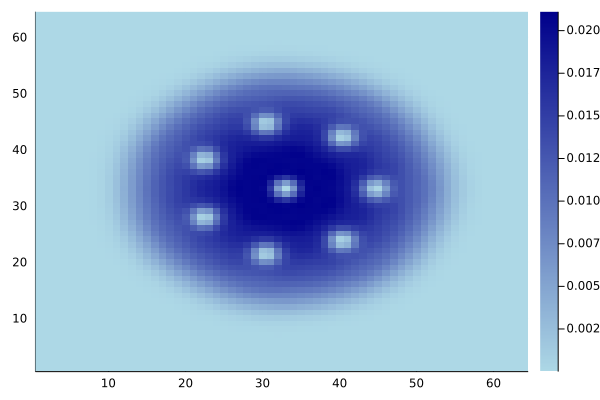

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)